# 2.3.3 선형모델(p.73)

## mglearn 패키지의 예제데이터셋 모듈 중 <font color = blue>wave(수치예측용) 데이터셋 메서드</font>를 로딩방법 3가지

In [1]:
# mglearn(뮐가런) 패키지의 모든 모듈을 메모리로 로딩
import mglearn
wave = mglearn.datasets.make_wave()

# mglearn(뮐가런) 패키지에 속한 모듈중에서 datasets 모듈만 메모리로 로딩
from mglearn import datasets 
wave = datasets.make_wave()

# mglearn(뮐가런) 패키지의 datasets 모듈에 속한 특정 메서드(함수)를 메모리로 로딩
from mglearn.datasets import make_wave
# make_wave()메서드로 데이터셋 생성시 1개 객체에 할당
wave = make_wave()

## wave 데이터셋 생성방법 2가지

In [2]:
# make_wave()메서드로 데이터셋 생성시 1개 객체에 할당
wave = make_wave()

# wave()메서드로 데이터셋 생성시 2개 객체에 동시할당
X, y = make_wave(n_samples = 42)
# - 1차원 배열로 있는 예측(독립)변수 데이터셋을 대문자 X에 할당
# - 1차원 배열로 있는 반응(종속)변수 데이터셋을 소문자 y에 할당

## 그래프에 한글을 사용하기 위한 파라미터설정

In [3]:
## mtplotlib의 rcParams에서 특정 폰트를 글로벌 폰트패밀리로 등록

%matplotlib inline
# matplotlib패키지 전체를 mpl로, matplotlib.pyplot모듈을 plt라는 별칭으로 각각 로딩함
import matplotlib as mpl
import matplotlib.pyplot as plt # 그래프 그리는 모듈

mpl.rcParams['font.family'] = 'NanumGothic'
# - 이 노트북 파일에 한해 그래프에 나눔고딕으로 폰트를 기본으로 설정함

plt.rcParams['axes.unicode_minus'] = False 
# - 그래프 축눈금에 마이너스의 경우 출력이 제대로 되기위한 옵션

w[0]: 0.393906  b: -0.031804


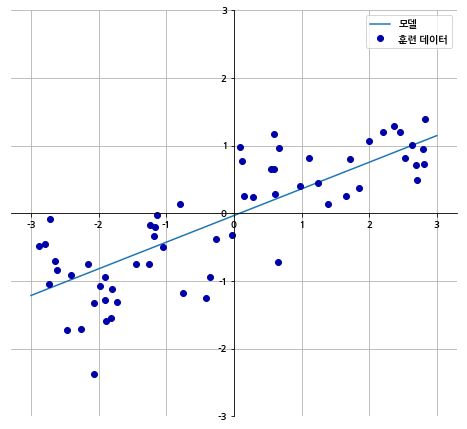

In [4]:
mglearn.plots.plot_linear_regression_wave()

## Linear Regression aka Ordinary Least Squares: <font color = red>p.76 선형회귀(최소제곱법)</font>
* 평균제곱오차(MSE: Mean Square Error)를 최소화하는 파라미터 w(회귀계수; 기울기)와 b(절편)를 찾음
* 평균제곱오차: 예측값과 타깃값의 차이를 제곱해 모두 더한 후에 샘플의 갯수로 나누어줌

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

### wave 데이터셋을 이용한 선형회귀

In [6]:
# 60개 각각 샘플로 잡아서 X와 y변수에 각각 넣음
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # 42는 random seed로 생각하면 됨
# train_test_split = 75% train set  / 25% test set으로 나눠서 넣어줌.

lr = LinearRegression().fit(X_train, y_train)  # 객체 생성 후 모델 학습까지!

In [7]:
print("lr.coef_: {}".format(lr.coef_)) #  coef_ : 회귀값
print("lr.intercept_: {}".format(lr.intercept_)) # intercept_ : 오차항

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [8]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# - 훈련데이터를 이용한 학습결과가 0.67로 과소적합된 상태라고 할 수 있 

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


### boston 데이터셋을 이용한 선형회귀

In [9]:
# boston 데이터셋 로딩과 내용
boston = mglearn.datasets.load_extended_boston()

print(type(boston))
print(len(boston))
print()
boston

<class 'tuple'>
2



(array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7,

In [10]:
# 피처: 예측(독립)변수 파악 - 주택가격에 영향을 미치는 변수
print(type(boston[0]))
print(boston[0].shape)
print()
print(boston[0])

<class 'numpy.ndarray'>
(506, 104)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]]


In [11]:
# 타깃: 반응(종속)변수 파악 - 주택가격
print(type(boston[1]))
print(boston[1].shape)
print()
print(boston[1])

<class 'numpy.ndarray'>
(506,)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37. 

In [12]:
# boston 데이터셋 로딩시 피처:예측(독립변수)셋과 타깃:반응(종속)변수셋을 분리해서 로딩
X, y = mglearn.datasets.load_extended_boston()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 선현회귀모형에 피팅
lr = LinearRegression().fit(X_train, y_train)

In [13]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(lr.coef_ != 0)))
# - 훈련데이터의 설명력은 높으나 테스트세트에 대한 설명력은 현저하게 낮아짐
# - 훈련데이터에 대해서만 예측력이 우수한 모델이며, 테스트데이터에는 불안전성을 보여 과대적합한 상태임

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61
사용한 피처의 개수: 104


In [14]:
# 사용힌 피처별 회귀계수값
lr.coef_

array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
       -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
        2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
       -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
        1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
        5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
       -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
       -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
       -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
        6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
       -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
       -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
       -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868183e+01,
        7.08999816e+00, -

## Ridge regression: <font color = red>p.78 릿지회귀 (L2규제화)</font> 
* 기본 회귀계수의 과다추정을 방지하기 위해 각 피처의 회귀계수를 거의 0에 가깝게 만들어가지만 탈락시키지는 않음
* 회귀계수오차항(평규제곱오차)에 회귀계수의 제곱의 합을 페널티로 추가계산해 더해줌
* 피처를 예측모델에 모두 포함시켜 전체적인 예측모델의 작동메커니즘을 이해할 수 있도록 해줌

In [15]:
from sklearn.linear_model import Ridge

# 알파 = 1 기본모델
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ridge.coef_ != 0)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75
사용한 피처의 개수: 104


In [16]:
# 사용힌 피처별 회귀계수값
ridge.coef_

array([-1.41368408e+00, -1.55661895e+00, -1.46543409e+00, -1.26616071e-01,
       -7.91193605e-02,  8.33161023e+00,  2.54975060e-01, -4.94145701e+00,
        3.89862268e+00, -1.05866058e+00, -1.58433734e+00,  1.05103856e+00,
       -4.01220799e+00,  3.33720475e-01,  3.64725471e-03, -8.49295793e-01,
        7.44989267e-01, -1.43106836e+00, -1.62981017e+00, -1.40486294e+00,
       -4.47314366e-02, -1.74619880e+00, -1.46715888e+00, -1.33237111e+00,
       -1.69154625e+00, -5.06179637e-01,  2.62197591e+00, -2.09210002e+00,
        1.95074661e-01, -2.75469422e-01,  5.11308202e+00, -1.67083739e+00,
       -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,  4.01805897e-02,
       -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,  7.91904036e-01,
        1.35260232e+00, -4.03661265e+00,  2.32361734e+00, -3.36712926e+00,
        1.81279204e+00,  3.01566897e+00, -1.89452070e+00, -2.50844073e-01,
       -2.89543735e+00, -1.26616071e-01, -5.00217192e+00, -2.43951806e+00,
        2.85071846e+00, -

In [17]:
# 알파 = 10 모델 
# - 계수의 제약이 상대적으로 강함, 계수를 거의 0에 가깝게 만듦
# - 모델의 복잡도가 낮아짐, 훈련셋의 성능이 낮지만 일반화에는 긍정적 

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ridge10.coef_ != 0)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
사용한 피처의 개수: 104


In [18]:
# 사용힌 피처별 회귀계수값
ridge10.coef_

array([-8.11609631e-01,  6.47608896e-01, -8.09783229e-01,  3.11334709e-01,
       -6.84623747e-01,  4.38797575e+00, -1.47554474e-01, -2.44214065e+00,
        8.45915099e-01, -1.14727508e+00, -2.33162040e+00,  1.06787015e+00,
       -3.98391025e+00, -5.98636976e-01,  2.93228193e-03, -5.21253823e-01,
        1.40339673e-01, -6.45256057e-01, -7.61400539e-01, -7.47231171e-01,
       -3.86298005e-02, -8.29808059e-01, -7.52859756e-01, -6.75605899e-01,
       -8.72001488e-01, -3.23330640e-01,  1.27336327e+00, -3.37279550e-01,
        6.30682038e-02,  2.37092897e-01,  2.09805607e+00,  1.00996768e-01,
       -2.79529662e-01,  1.73222619e-01, -3.33557850e-01, -3.74226653e-01,
        6.98414808e-01, -6.96284918e-01,  7.79521010e-01,  3.74843210e-01,
       -6.24101244e-01, -7.63657605e-01,  4.35756439e-02, -1.04000852e+00,
        4.24401576e-01,  4.78687021e-01, -3.84125445e-01, -9.93802653e-02,
       -1.30226356e+00,  3.11334709e-01, -5.92097637e-01,  6.33816542e-01,
        6.66792895e-01, -

In [19]:
# 알파 = 0.1 모델
# - 계수의 제약이 상대적으로 약함, 계수를 일반 선형회귀에 가깝게 만듦
# - 모델의 복잡도가 올라감, 훈련셋의 성능은 과대적합 가능성 

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ridge01.coef_ != 0)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
사용한 피처의 개수: 104


In [20]:
# 사용힌 피처별 회귀계수값
ridge01.coef_

array([-2.33300720e+00, -5.44192850e+00, -6.12865463e+00, -7.78524693e-01,
        1.29152995e+00,  1.90222839e+01,  4.35864731e+00, -1.11911067e+01,
        9.55539672e+00, -7.48671406e-01, -5.33307088e-01,  6.23384946e+00,
       -2.72886731e+00,  5.86117121e+00,  2.28233711e-02, -9.01608311e-01,
        4.66756441e+00, -3.37983354e+00,  1.31611460e+00, -3.48895554e+00,
        4.41536215e-01, -3.51941085e+00, -2.52222659e+00, -2.69562070e+00,
        2.44649480e-01, -1.02306604e+00,  3.04223584e+00, -2.68804128e+00,
        4.28396019e+00, -2.94109311e+00,  8.70934702e+00, -3.13683472e+00,
       -2.91608183e-01,  2.17487375e+00,  3.62658111e+00,  2.30047840e+00,
       -2.83789461e+00, -6.17207969e+00,  7.94858912e+00,  1.65631996e+00,
        8.72779643e+00,  1.08042552e+00,  5.72208008e+00, -4.76401068e+00,
        5.07461001e+00,  8.01603635e+00, -8.44254041e+00, -6.44526450e-01,
       -1.42288399e+01, -7.78524693e-01, -1.38982595e+01, -1.59298479e+01,
        6.42600904e+00, -

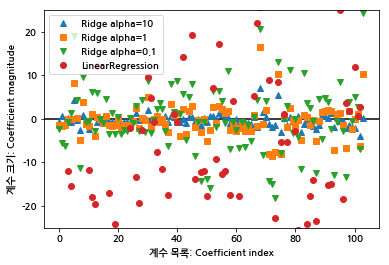

In [21]:
# 릿지회귀의 L2규제강도 alpha값의 변화에 따른 종합비교
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("계수 목록: Coefficient index")
plt.ylabel("계수 크기: Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

# - alpha = 10: 계수에 대한 제약이 강함, 대부분의 계수는 -3 ~ +3 사이에 위치
# - alpha =  1: 계수에 대한 제약이 중간, 모델의 계수가 좀 더 넓은 구간에 있음
# - alpha = 0.1: 계수에 대한 제약이 약함, 모델의 계수가 더 넓은 구간에 있음
# - alpha =   0: 계수에 대한 제약이 없음, 모델의 계수가 매우 넓은 구간에 있음

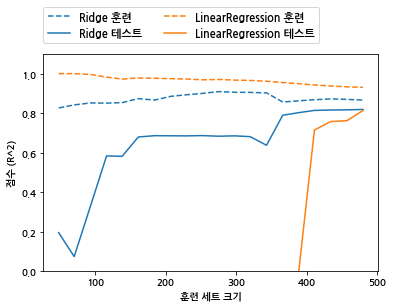

In [22]:
# 데이터셋의 크기에 따른 모델의 성능변화: 학습곡선
mglearn.plots.plot_ridge_n_samples()

# - 2개 모델 모두 훈련데이터(점선) 설명력이 테스트데이터(실선) 보다 높음
# - 훈련데이터에서 릿지회귀(파란점선)는 규제가 적용되어 설명력이 선형회귀(빨간점선)보다 낮음
# - 테스트데이터에서 릿지회귀(파란실선)의 점수가 선형회귀(빨간실선)보다 높음

# - 데이터가 400미만인경우 선형회귀(빨간실선)의 테스트결과는 매우 나쁘며, 
#   그 이상 충분한 셋이 주어지면 릿지(파란실선) 테스트결과와 유사해짐
# - 데이터가 많아질수록 선형회귀의 훈련데이터(빨간점선) 과대적합 가능성도 줄어들게 됨

##### Lasso: <font color = red>p.82 라소회귀 (L1규제화)</font> 
* 기본 회귀계수의 과다추정을 방지하기 위해 일부 피처의 계수를 0으로 만들어 피처선택이 이루어짐
* 회귀계수오차항(평규제곱오차)에 회귀계수의 절대값의 합을 페널티로 추가계산해 더해줌
* 모델이 릿지에 비해 단순해지고, 이해하기 쉬워지며, 가장 중요한 피처이 무엇인지 파악가능함

In [23]:
# 알파 = 10 모델 
# - 계수의 제약이 상대적으로 강함, 계수를 거의 0에 가깝게 만듦
# - 모델의 복잡도가 낮아짐, 훈련셋의 성능이 낮지만 일반화에는 긍정적 


# 알파 = 0.1 모델
# - 계수의 제약이 상대적으로 약함, 계수를 일반 선형회귀에 가깝게 만듦
# - 모델의 복잡도가 올라감, 훈련셋의 성능은 과대적합 가능성 

In [24]:
from sklearn.linear_model import Lasso
import numpy as np

# alpha = 1 기본값 사용
# - 훈련셋결과와 테스트셋결과가 모두 낮고, 피처도 4개만 사용된 모델이라 과소적합된 상황임 
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 피처의 개수: 4


In [25]:
# 사용힌 피처별 회귀계수값
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [26]:
# alpha = 0.1, max_iter = 100000
# - 알파값이 낮아질수록 계수에 대한 규제강도가 낮아지게 됨
# - 선택되는 피처가 늘어나면서 모델의 복잡도가 증가하며 성능도 개선되게 됨
# - 피처도 적정 선택이 되어 모델패턴을 찾기가 쉬워짐

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 피처의 개수: 33


In [27]:
# 사용힌 피처별 회귀계수값
lasso001.coef_

array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.43260465,
        10.94771183,   0.        ,   0.        ,   0.        ,
        -0.39260971,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.75628457,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.10027365,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.96958293,
         0.        ,   6.61845793,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.42086828,  -2.10371434,
         3.79607992,  -0.        ,   4.38591262,   0.        ,
         0.        ,   0.1795777 ,  -0.        ,  -1.1614282 ,
        -4.33485764,  -0.        ,  -0.        ,  -2.13

In [28]:
# alpha = 0.0001 모델
# - 알파값을 너무 낮추면 계수의 제약이 매우 약해 규제의 효과가 없어짐
# - 탈락되는 피처가 거의 없어 모델의 복잡도가 올라감
# - 일반 선형회귀와 같아지므로 훈련셋에 대한 과대적합 가능성이 있음

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 피처의 개수: 96


In [29]:
# 사용힌 피처별 회귀계수값
lasso00001.coef_

array([-0.00000000e+00, -2.22112506e+01, -8.50460785e+01, -8.84911727e+00,
       -3.29747331e+00,  3.80364498e+01,  4.79228263e+01, -3.79968178e+01,
        2.78218641e+01,  0.00000000e+00, -7.57027820e-01,  2.59844375e+00,
       -1.10854083e+01,  1.00632159e+01,  0.00000000e+00,  0.00000000e+00,
        1.13251636e+02, -1.67111092e+01,  2.77529962e+01, -3.05160674e+01,
        0.00000000e+00, -1.01269722e+01, -0.00000000e+00, -0.00000000e+00,
       -3.97525034e-01,  3.03276326e+01, -8.17609874e+00, -1.41714196e+01,
       -2.24575996e+00, -5.24158108e+01,  7.09612408e+00,  2.49508901e+00,
       -7.19880905e+00, -2.94632210e+00,  2.58438205e+01, -5.14091096e+00,
        3.32496024e+01, -1.26505982e+01,  3.03546677e+01, -1.08693198e+00,
        1.82716499e+01,  4.76099968e+01,  1.24705759e+01,  4.17977677e+01,
       -0.00000000e+00,  1.97409406e+01, -7.42612798e+00,  1.95633038e+01,
       -1.29388874e+01, -1.53095081e+01, -1.65903957e+01, -3.12385990e+01,
        8.10044556e+00, -

Text(0, 0.5, '계수 크기: Coefficient magnitude')

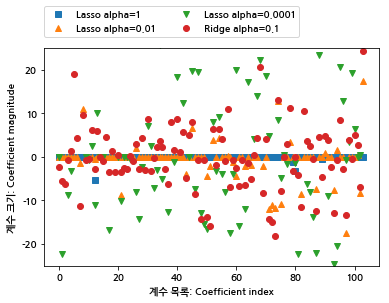

In [30]:
# 라소회귀의 L1규제강도 alpha값의 변화에 따른 종합비교
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록: Coefficient index")
plt.ylabel("계수 크기: Coefficient magnitude")

# - 라쏘 alpha = 1: 계수에 대한 제약이 강함, 계수 대부분이 0임
# - 라쏘 alpha = 0.01: 계수에 대한 제약이 중간, 모델의 계수가 좀 더 넓은 구간에 있음
# - 라쏘 alpha = 0.0001: 계수에 대한 제약이 약함, 모델의 계수가 매우 넓은 구간에 있음

# - 릿지 alpha = 0.1은 라쏘 alpha = 0.01과 비슷한 계수크기
# - 같은 성능을 나타내는 상황에서 전체 피처피처을 예측모델에 유지하려면 릿지회귀를, 
#   피처선택을 통해 분석하기 쉬운모델을 만들려면 라쏘회귀를 선정

## ElasticNet: <font color = red>p.85 엘라스틱넷 (L1규제화 + L2규제화)</font> 
* 릿지와 라쏘의 패널티를 결합한 방식 
* 기본 회귀계수의 과다추정을 방지하기 위해 일부 피처의 계수를 0으로 만들어 피처선택이 이루어짐
* 회귀계수오차항(평균제곱오차)에 회귀계수의 제곱의 합(릿지회귀 L2규제화)과 절대값의 합(라쏘회귀 L1규제화)을 페널티로 추가계산해 더해줌
* alpha 파마미터를 통해 페널티의 강도를 조절
* l1_ratio 파라미터를 통해 L1과 L2파라미터의 상대적 비율을 조정, 0.0 릿지 ~ 1.0 라쏘

In [31]:
from sklearn.linear_model import ElasticNet

# 알파 = 1 기본모델, l1=ratio = 0.5 릿지와 라쏘의 중간모델 
ela_a10_lr05 = ElasticNet(alpha = 1.0, l1_ratio = 0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ela_a10_lr05.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ela_a10_lr05.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ela_a10_lr05.coef_ != 0)))

훈련 세트 점수: 0.33
테스트 세트 점수: 0.22
사용한 피처의 개수: 38


In [32]:
# 사용힌 피처별 회귀계수값
lasso001.coef_

array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.43260465,
        10.94771183,   0.        ,   0.        ,   0.        ,
        -0.39260971,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.75628457,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.10027365,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.96958293,
         0.        ,   6.61845793,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.42086828,  -2.10371434,
         3.79607992,  -0.        ,   4.38591262,   0.        ,
         0.        ,   0.1795777 ,  -0.        ,  -1.1614282 ,
        -4.33485764,  -0.        ,  -0.        ,  -2.13

In [33]:
# 알파 = 1 기본모델, l1=ratio = 1.0 라쏘 모델
ela_a10_lr10 = ElasticNet(alpha = 1.0, l1_ratio = 1.0).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ela_a10_lr10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ela_a10_lr10.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ela_a10_lr10.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 피처의 개수: 4


In [34]:
# 사용힌 피처별 회귀계수값
ela_a10_lr10.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [35]:
# 알파 = 1 기본모델, l1=ratio = 0.0 릿지 모델
ela_a10_lr00 = ElasticNet(alpha = 1.0, l1_ratio = 0.0).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ela_a10_lr00.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ela_a10_lr00.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ela_a10_lr00.coef_ != 0)))

훈련 세트 점수: 0.42
테스트 세트 점수: 0.28
사용한 피처의 개수: 104


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [36]:
# 사용힌 피처별 회귀계수값
ela_a10_lr00.coef_

array([-1.38430300e-01,  3.65454421e-01, -4.54405742e-01,  2.53485583e-01,
       -2.95863143e-01,  6.07657363e-01, -3.35149396e-01,  7.14445723e-03,
       -2.83530000e-01, -4.49332482e-01, -6.62973160e-01,  3.42609091e-01,
       -7.90275631e-01, -6.20804000e-02,  5.28812113e-04, -8.98792974e-02,
        1.11552753e-02, -9.11075886e-02, -5.91245267e-02, -1.31561785e-01,
       -6.79831068e-03, -1.36562440e-01, -1.25781194e-01, -1.14204740e-01,
       -8.86133484e-02, -9.73495681e-02,  2.65283714e-01,  2.50650374e-02,
        2.74373109e-02,  5.70972496e-02,  3.22825246e-01,  1.33895474e-01,
        1.04624955e-01,  4.65239300e-02,  4.47501849e-02,  6.41354026e-02,
        3.63206795e-01,  3.68412688e-03, -3.20700080e-01,  1.26309185e-01,
       -3.07526830e-01, -7.63662216e-02, -4.39410969e-01, -5.88203306e-02,
       -2.47533481e-01, -3.29289062e-01, -4.45118002e-01, -2.33233238e-01,
       -4.74965761e-01,  2.53485583e-01,  7.98085503e-02,  2.12344037e-01,
        1.93461473e-01,  

In [37]:
# 알파 = 0.1 모델, l1=ratio = 0.5 릿지-라쏘 중간 모델
ela_a01_lr05 = ElasticNet(alpha = 0.1, l1_ratio = 0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ela_a01_lr05.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ela_a01_lr05.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ela_a01_lr05.coef_ != 0)))

훈련 세트 점수: 0.72
테스트 세트 점수: 0.55
사용한 피처의 개수: 58


In [38]:
# 사용힌 피처별 회귀계수값
ela_a01_lr05.coef_

array([-0.11668517,  0.45449994, -0.69302345,  0.4763029 , -0.15742755,
        3.3411999 , -0.        , -1.10302997,  0.        , -0.76577739,
       -2.44310046,  0.81593634, -3.68229623, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.04392692,
       -0.        , -0.10634509, -0.01630692, -0.        , -0.        ,
       -0.        ,  0.50142111, -0.        ,  0.        ,  0.        ,
        1.13562036,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.48554848, -0.        , -0.        ,  0.        ,
       -0.34775794, -0.        , -0.14234577, -0.        , -0.        ,
       -0.        , -0.31701609, -0.        , -1.19205178,  0.47633391,
        0.        ,  0.37008422,  0.32658736,  0.        ,  0.61580677,
        0.39282295,  0.19323358,  0.50531751, -0.        , -0.76139625,
        0.        , -0.36275775, -0.        , -0.        , -0.34129909,
       -0.62737161,  0.        , -1.36265017,  5.18790002,  0.98

In [39]:
# 알파 = 0.01 모델, l1=ratio = 0.5 릿지-라쏘 중간 모델
ela_a001_lr05 = ElasticNet(alpha = 0.01, l1_ratio = 0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ela_a001_lr05.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ela_a001_lr05.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ela_a001_lr05.coef_ != 0)))

훈련 세트 점수: 0.86
테스트 세트 점수: 0.72
사용한 피처의 개수: 84


In [40]:
# 사용힌 피처별 회귀계수값
ela_a001_lr05.coef_

array([-1.26522576e+00, -2.32875808e-01, -5.36546782e-01,  0.00000000e+00,
       -7.26038445e-02,  6.42753699e+00,  0.00000000e+00, -4.16892207e+00,
        2.34861213e+00, -1.00789122e+00, -1.93161142e+00,  6.91379330e-01,
       -4.60308665e+00, -3.06512555e-01,  0.00000000e+00, -4.33322350e-01,
        0.00000000e+00, -8.97343466e-01, -1.23226124e+00, -1.13149479e+00,
       -0.00000000e+00, -1.45498329e+00, -1.17609885e+00, -9.47269446e-01,
       -1.52473049e+00, -0.00000000e+00,  1.48242089e+00, -7.77954912e-01,
       -0.00000000e+00, -0.00000000e+00,  3.32843749e+00, -3.38347756e-01,
       -0.00000000e+00,  0.00000000e+00, -1.84006945e-01, -1.02980208e-01,
       -4.23564252e-02, -1.48607238e+00,  1.93289332e+00,  5.64885471e-02,
       -0.00000000e+00, -2.91713264e+00,  5.55384245e-01, -1.99173013e+00,
        8.21991165e-01,  1.46336823e+00, -1.98998284e-01, -0.00000000e+00,
       -1.13035994e+00,  0.00000000e+00, -1.98977659e+00, -0.00000000e+00,
        1.69681717e+00, -

In [41]:
# 알파 = 0.001 모델, l1=ratio = 0.5 릿지-라쏘 중간 모델
ela_a0001_lr05 = ElasticNet(alpha = 0.001, l1_ratio = 0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ela_a0001_lr05.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ela_a0001_lr05.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(ela_a0001_lr05.coef_ != 0)))

훈련 세트 점수: 0.92
테스트 세트 점수: 0.78
사용한 피처의 개수: 95


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [42]:
# 사용힌 피처별 회귀계수값
ela_a0001_lr05.coef_

array([-2.43630056e+00, -2.42335744e+00, -4.70562327e+00, -0.00000000e+00,
        8.59976836e-01,  1.43278222e+01,  3.29085898e+00, -1.01288235e+01,
        1.28770717e+01,  7.93432533e-01,  0.00000000e+00,  2.89619824e+00,
       -1.09213889e+00,  2.51227018e+00,  0.00000000e+00, -5.97863783e-01,
        2.00816848e+00, -2.17824124e+00, -0.00000000e+00, -2.19125048e+00,
        0.00000000e+00, -2.80967677e+00, -2.05687814e+00, -1.95215687e+00,
       -0.00000000e+00, -8.88822446e-01,  2.78486652e+00, -2.75015923e+00,
        2.34968618e+00, -8.88170667e-01,  7.13679547e+00, -3.17759906e+00,
        0.00000000e+00,  7.71628218e-02,  7.12979248e-01,  5.91696386e-01,
       -2.93976948e+00, -5.20891473e+00,  6.05798920e+00,  1.43102625e+00,
        6.31963348e+00, -1.20781067e+00,  6.01316988e+00, -4.76156702e+00,
        7.82101774e+00,  5.75871535e+00, -6.15574382e+00, -8.88160976e-01,
       -9.98336452e+00,  0.00000000e+00, -1.10087909e+01, -1.12324917e+01,
        4.90969583e+00, -

# End of Source